# Data Set Information:
The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine. For more details, consult: [Web Link] or the reference [Cortez et al., 2009]. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

These datasets can be viewed as classification or regression tasks. The classes are ordered and not balanced (e.g. there are munch more normal wines than excellent or poor ones). Outlier detection algorithms could be used to detect the few excellent or poor wines. Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.

# Attribute Information:

For more information, read [Cortez et al., 2009]. 
Input variables (based on physicochemical tests): 

1 - fixed acidity 

2 - volatile acidity 

3 - citric acid 

4 - residual sugar 

5 - chlorides 

6 - free sulfur dioxide

7 - total sulfur dioxide 

8 - density 

9 - pH 

10 - sulphates 

11 - alcohol 

Output variable (based on sensory data): 

12 - quality (score between 0 and 10)


In [1]:
%pylab inline

from collections import defaultdict

import pandas as pd
from scipy.cluster.hierarchy import dendrogram, set_link_color_palette
from fastcluster import linkage

from matplotlib.colors import rgb2hex, colorConverter

import numpy as np
from scipy.stats import zscore
# importing ploting libraries
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns


Populating the interactive namespace from numpy and matplotlib


In [5]:
# reading the CSV file into pandas dataframe
df = pd.read_csv("winequality-red.csv") 
df

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
5               7.4             0.660         0.00             1.8      0.075   
6               7.9             0.600         0.06             1.6      0.069   
7               7.3             0.650         0.00             1.2      0.065   
8               7.8             0.580         0.02             2.0      0.073   
9               7.5             0.500         0.36             6.1      0.071   
10              6.7             0.580         0.08             1.8      0.097   
11              7.5             0.500         0.36             6.1      0.071   
12              5.6             0.615         0.00             1.6      0.089   
13              7.8             0.610         0.29             1.6      0.114   
14              8.9             0.620         0.18             3.8      0.176   
15              8.9             0.620         0.19             3.9      0.170   
16              8.5             0.280         0.56             1.8      0.092   
17              8.1             0.560         0.28             1.7      0.368   
18              7.4             0.590         0.08             4.4      0.086   
19              7.9             0.320         0.51             1.8      0.341   
20              8.9             0.220         0.48             1.8      0.077   
21              7.6             0.390         0.31             2.3      0.082   
22              7.9             0.430         0.21             1.6      0.106   
23              8.5             0.490         0.11             2.3      0.084   
24              6.9             0.400         0.14             2.4      0.085   
25              6.3             0.390         0.16             1.4      0.080   
26              7.6             0.410         0.24             1.8      0.080   
27              7.9             0.430         0.21             1.6      0.106   
28              7.1             0.710         0.00             1.9      0.080   
29              7.8             0.645         0.00             2.0      0.082   
...             ...               ...          ...             ...        ...   
1569            6.2             0.510         0.14             1.9      0.056   
1570            6.4             0.360         0.53             2.2      0.230   
1571            6.4             0.380         0.14             2.2      0.038   
1572            7.3             0.690         0.32             2.2      0.069   
1573            6.0             0.580         0.20             2.4      0.075   
1574            5.6             0.310         0.78            13.9      0.074   
1575            7.5             0.520         0.40             2.2      0.060   
1576            8.0             0.300         0.63             1.6      0.081   
1577            6.2             0.700         0.15             5.1      0.076   
1578            6.8             0.670         0.15             1.8      0.118   
1579            6.2             0.560         0.09             1.7      0.053   
1580            7.4             0.350         0.33             2.4      0.068   
1581            6.2             0.560         0.09             1.7      0.053   
1582            6.1             0.715         0.10             2.6      0.053   
1583            6.2             0.460         0.29             2.1      0.074   
1584            6.7             0.320         0.44             2.4      0.061   
1585            7.2             0.390         0.44             2.6      0.066   
1586            7.5             0.310

In [6]:
wine_data = df.loc[:, 'fixed_acidity':'alcohol']
wine_data

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
5               7.4             0.660         0.00             1.8      0.075   
6               7.9             0.600         0.06             1.6      0.069   
7               7.3             0.650         0.00             1.2      0.065   
8               7.8             0.580         0.02             2.0      0.073   
9               7.5             0.500         0.36             6.1      0.071   
10              6.7             0.580         0.08             1.8      0.097   
11              7.5             0.500         0.36             6.1      0.071   
12              5.6             0.615         0.00             1.6      0.089   
13              7.8             0.610         0.29             1.6      0.114   
14              8.9             0.620         0.18             3.8      0.176   
15              8.9             0.620         0.19             3.9      0.170   
16              8.5             0.280         0.56             1.8      0.092   
17              8.1             0.560         0.28             1.7      0.368   
18              7.4             0.590         0.08             4.4      0.086   
19              7.9             0.320         0.51             1.8      0.341   
20              8.9             0.220         0.48             1.8      0.077   
21              7.6             0.390         0.31             2.3      0.082   
22              7.9             0.430         0.21             1.6      0.106   
23              8.5             0.490         0.11             2.3      0.084   
24              6.9             0.400         0.14             2.4      0.085   
25              6.3             0.390         0.16             1.4      0.080   
26              7.6             0.410         0.24             1.8      0.080   
27              7.9             0.430         0.21             1.6      0.106   
28              7.1             0.710         0.00             1.9      0.080   
29              7.8             0.645         0.00             2.0      0.082   
...             ...               ...          ...             ...        ...   
1569            6.2             0.510         0.14             1.9      0.056   
1570            6.4             0.360         0.53             2.2      0.230   
1571            6.4             0.380         0.14             2.2      0.038   
1572            7.3             0.690         0.32             2.2      0.069   
1573            6.0             0.580         0.20             2.4      0.075   
1574            5.6             0.310         0.78            13.9      0.074   
1575            7.5             0.520         0.40             2.2      0.060   
1576            8.0             0.300         0.63             1.6      0.081   
1577            6.2             0.700         0.15             5.1      0.076   
1578            6.8             0.670         0.15             1.8      0.118   
1579            6.2             0.560         0.09             1.7      0.053   
1580            7.4             0.350         0.33             2.4      0.068   
1581            6.2             0.560         0.09             1.7      0.053   
1582            6.1             0.715         0.10             2.6      0.053   
1583            6.2             0.460         0.29             2.1      0.074   
1584            6.7             0.320         0.44             2.4      0.061   
1585            7.2             0.390         0.44             2.6      0.066   
1586            7.5             0.310

In [5]:
wine_data_scaled = wine_data.apply(zscore)

In [6]:
from sklearn.cluster import AgglomerativeClustering 

In [7]:
model = AgglomerativeClustering(n_clusters=6, affinity='euclidean',  linkage='average')

In [8]:
model.fit(wine_data_scaled)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='average', memory=None,
            n_clusters=6,
            pooling_func=<function mean at 0x00000273AA5878C8>)

In [9]:
wine_data_scaled['labels'] = model.labels_
type(wine_data_scaled)

pandas.core.frame.DataFrame

In [10]:
wine_clusters = wine_data_scaled.groupby(['labels'])
#wine_clusters = wine_data_attr.groupby(['clusters'])
print(wine_clusters)

In [11]:
wine_groups=wine_clusters.head(1599)#This creates a pandas dataframegroupby object
from pandas import ExcelWriter
writer = ExcelWriter('wine_groups.xls')
wine_groups.to_excel(writer,'Sheet1')
writer.save()
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage


In [12]:
from scipy.spatial.distance import pdist

In [13]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

Z = linkage(wine_data_scaled, 'average')#Average is having good score than ward
c, coph_dists = cophenet(Z , pdist(wine_data_scaled))

c

0.8086259071115209

# Elbow plot

In [14]:
from sklearn.cluster import KMeans
from scipy.stats import zscore
model1 = KMeans(n_clusters = 4)# enter model have enter data cluster = 3 beacuase the gender is 3 variables

In [15]:
cluster_range = range( 1, 15 )
cluster_errors = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 10 )
  clusters.fit(wine_data_scaled)
  labels = clusters.labels_
  centroids = clusters.cluster_centers_
  cluster_errors.append( clusters.inertia_ )# inertia calculte the variance and sum of squre error
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df[0:15]

num_clusters  cluster_errors
0              1    17717.789243
1              2    14456.529406
2              3    12755.748786
3              4    11345.451373
4              5    10206.466548
5              6     9414.880212
6              7     8695.493143
7              8     8355.469763
8              9     8014.758903
9             10     7764.461356
10            11     7516.645485
11            12     7307.739488
12            13     7126.629156
13            14     6870.794896

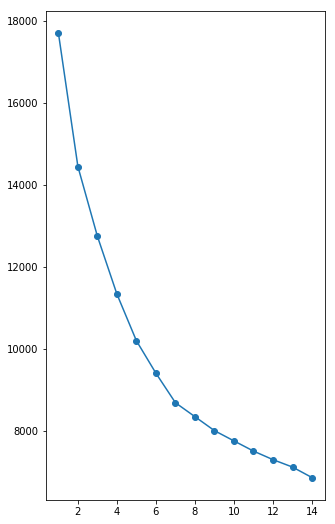

In [16]:
# Elbow plot

plt.figure(figsize=(5,9))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

# centroids

In [17]:
kmeans = KMeans(n_clusters=3, n_init = 15, random_state=2345)
kmeans.fit(wine_data_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=15, n_jobs=1, precompute_distances='auto',
    random_state=2345, tol=0.0001, verbose=0)

In [18]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters = 4)# enter model have enter data cluster = 3 beacuase the gender is 3 variables
centroids = kmeans.cluster_centers_# only we can check the magnitute
# k means is the my model
centroids# this centroide we creating the data frames

array([[-0.09193154,  0.04040678,  0.10002523,  0.40375126, -0.00565364,
         1.06837447,  1.32458255,  0.28337592, -0.17924274, -0.1874165 ,
        -0.51052828,  0.99465241],
       [-0.64954342,  0.45519175, -0.76049371, -0.23041486, -0.18882329,
        -0.22156028, -0.35074257, -0.45100943,  0.61490553, -0.28814064,
         0.0678794 ,  1.        ],
       [ 1.00398862, -0.68568878,  1.02077194,  0.03104975,  0.27616274,
        -0.47686049, -0.48168723,  0.43844069, -0.75207155,  0.55462042,
         0.28259117,  1.09163347]])

In [19]:
centroid_df = pd.DataFrame(centroids, columns = list(wine_data_scaled) ) # and we rename the columns
centroid_df.T# we need to check the centroide values

0         1         2
fixed_acidity        -0.091932 -0.649543  1.003989
volatile_acidity      0.040407  0.455192 -0.685689
citric_acid           0.100025 -0.760494  1.020772
residual_sugar        0.403751 -0.230415  0.031050
chlorides            -0.005654 -0.188823  0.276163
free_sulfur_dioxide   1.068374 -0.221560 -0.476860
total_sulfur_dioxide  1.324583 -0.350743 -0.481687
density               0.283376 -0.451009  0.438441
pH                   -0.179243  0.614906 -0.752072
sulphates            -0.187416 -0.288141  0.554620
alcohol              -0.510528  0.067879  0.282591
labels                0.994652  1.000000  1.091633

# Extract Clusters from Python Dendrogram
One aspect of using Python for data analysis is that hierarchical clustering dendrograms are rather cumbersome to work with. Both in terms of plotting next to a heatmap, and how to relate the input data to the resulting plot. Ideally the dendrogram function would return a proper instances of some Dendrogram class.

There are plenty (1, 2) of guides around on how to make R inspired heatmaps with dendrograms. Here I will describe how to parse out the cluster members as seen in a dendrogram, which can be handy if one notices interesting patterns in the corresponding heatmap.

Let's start with importing some modules.

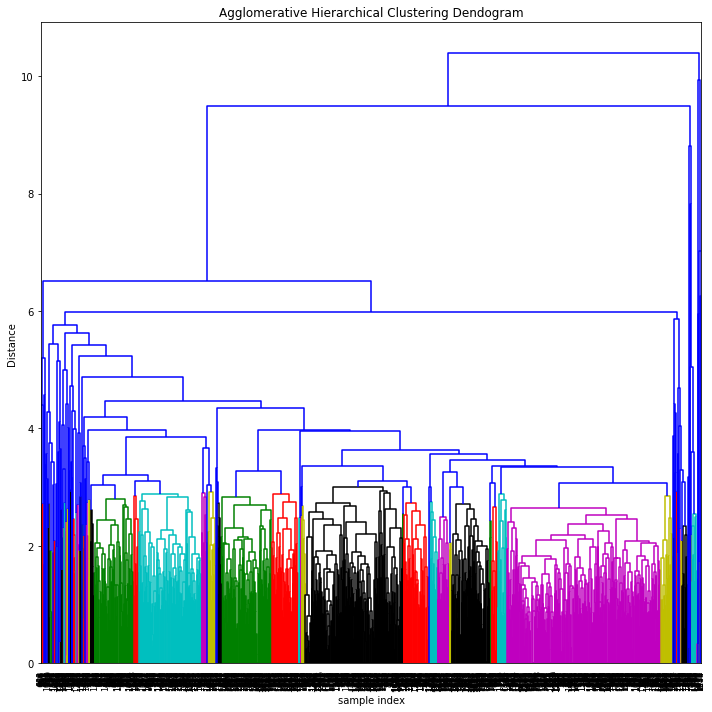

In [20]:
plt.figure(figsize=(10, 10))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
den = dendrogram(Z, leaf_rotation=90., color_threshold=3, leaf_font_size=8. )
plt.tight_layout()

In [21]:
den

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [25.0, 25.0, 35.0, 35.0],
  [65.0, 65.0, 75.0, 75.0],
  [55.0, 55.0, 70.0, 70.0],
  [45.0, 45.0, 62.5, 62.5],
  [30.0, 30.0, 53.75, 53.75],
  [10.0, 10.0, 41.875, 41.875],
  [105.0, 105.0, 115.0, 115.0],
  [95.0, 95.0, 110.0, 110.0],
  [85.0, 85.0, 102.5, 102.5],
  [25.9375, 25.9375, 93.75, 93.75],
  [125.0, 125.0, 135.0, 135.0],
  [165.0, 165.0, 175.0, 175.0],
  [155.0, 155.0, 170.0, 170.0],
  [145.0, 145.0, 162.5, 162.5],
  [130.0, 130.0, 153.75, 153.75],
  [185.0, 185.0, 195.0, 195.0],
  [205.0, 205.0, 215.0, 215.0],
  [225.0, 225.0, 235.0, 235.0],
  [210.0, 210.0, 230.0, 230.0],
  [255.0, 255.0, 265.0, 265.0],
  [275.0, 275.0, 285.0, 285.0],
  [260.0, 260.0, 280.0, 280.0],
  [245.0, 245.0, 270.0, 270.0],
  [220.0, 220.0, 257.5, 257.5],
  [315.0, 315.0, 325.0, 325.0],
  [305.0, 305.0, 320.0, 320.0],
  [355.0, 355.0, 365.0, 365.0],
  [345.0, 345.0, 360.0, 360.0],
  [335.0, 335.0, 352.5, 352.5],
  [312.5, 312.5, 343.75, 343.75],
  [295.0, 295.0, 3

The tree is represented as a collection of ∏ shaped components.

The three items named color_list, dcoord, icoord indexes these ∏’s

Obviosly color_list contains the colors. The lists in dcoord contain the y coordinates of the ∏’s (the distances) while icoord has the x coordinates. These would be the index coordinates.

In the minimal example above we have two ∏’s, and one can see that the x-coordinates are repeated once.

The coordinates go from left to right. So for the red ∏, the ‘legs’ are located at 15 and 25, while the grey one has legs at 5 and 20.

The apperant pattern is that legs positioned at leaves will end with 5. The reason is to nicely place the leg at the middle of the corresponding leaf index value. This also implies the actual list indices of the leaf are multiplied by 10.

Thus we first subtract 5 from each colors icoord, then divide by 10. If the resulting number is close to the closest integer, we consider this to be an index for a leaf. If the resulting number is not close to an integer index, it means the colored tree we got it from is from non-leaf parts of the trees.

For each leaf, we add it to a list per color in a dictionary.

In [22]:
cluster_idxs = defaultdict(list)
for c, pi in zip(den['color_list'], den['icoord']):
    for leg in pi[1:3]:
        i = (leg - 5.0) / 10.0
        if abs(i - int(i)) < 1e-5:
            cluster_idxs[c].append(int(i))

Next we need to grab the labels of the leaves given the indexes. But before we do that, since it’s difficult to keep track of what color e.g. #c13d3f is, we make make an IPython notebook compatible HTML representation of the dictionary holding the information. Objects of this class will behave just like dictionaries, except for representing them as a HTML table.

In [23]:
class Clusters(dict):
    def _repr_html_(self):
        html = '<table style="border: 0;">'
        for c in self:
            hx = rgb2hex(colorConverter.to_rgb(c))
            html += '<tr style="border: 0;">' \
            '<td style="background-color: {0}; ' \
                       'border: 0;">' \
            '<code style="background-color: {0};">'.format(hx)
            html += c + '</code></td>'
            html += '<td style="border: 0"><code>' 
            html += repr(self[c]) + '</code>'
            html += '</td></tr>'
        
        html += '</table>'
        
        return html

In [24]:
cluster_classes = Clusters()
for c, l in cluster_idxs.items():
    i_l = [den['ivl'][i] for i in l]
    cluster_classes[c] = i_l

In [25]:
cluster_classes

{'g': ['608',
  '889',
  '9',
  '11',
  '39',
  '40',
  '155',
  '157',
  '154',
  '156',
  '215',
  '415',
  '515',
  '291',
  '730',
  '743',
  '744',
  '994',
  '368',
  '1436',
  '264',
  '344',
  '363',
  '1224',
  '328',
  '359',
  '205',
  '206',
  '358',
  '449',
  '450',
  '407',
  '470',
  '531',
  '532',
  '402',
  '664',
  '814',
  '397',
  '398',
  '403',
  '560',
  '565',
  '811',
  '453',
  '458',
  '241',
  '699',
  '441',
  '1454',
  '212',
  '437',
  '580',
  '581',
  '582',
  '433',
  '435',
  '468',
  '362',
  '394',
  '601',
  '603',
  '680',
  '596',
  '611',
  '599',
  '459',
  '593',
  '305',
  '310',
  '295',
  '367',
  '507',
  '618',
  '597',
  '937',
  '979',
  '984',
  '1359',
  '1362',
  '650',
  '656',
  '667',
  '669',
  '464',
  '674',
  '676',
  '619',
  '583',
  '280',
  '56',
  '979',
  '409',
  '510',
  '356',
  '488',
  '472',
  '548',
  '446',
  '286',
  '575',
  '434',
  '438',
  '272',
  '574',
  '1088',
  '1089',
  '657',
  '512',
  '250',
  '709',
  '113',
  '579',
  '679',
  '1285',
  '1548',
  '3',
  '858',
  '509',
  '491',
  '492',
  '467',
  '210',
  '267',
  '1482',
  '1518',
  '1411',
  '1503',
  '1504',
  '1507',
  '1091',
  '1148',
  '1062',
  '956',
  '1169',
  '1427',
  '1580',
  '1000',
  '813',
  '954',
  '405',
  '955',
  '1458',
  '1483',
  '826',
  '952',
  '150',
  '973',
  '1179',
  '1180',
  '1405',
  '1162',
  '1544',
  '1440',
  '1450',
  '1449',
  '1549',
  '960',
  '964',
  '924',
  '928',
  '1198',
  '1125',
  '1322',
  '1242',
  '909',
  '914',
  '1201',
  '1112',
  '1509',
  '1087',
  '963',
  '1215',
  '401',
  '1201',
  '533',
  '817',
  '1010',
  '1106',
  '947',
  '951',
  '1023',
  '915',
  '336',
  '1202',
  '805',
  '807',
  '806',
  '1053',
  '1150',
  '944',
  '1008',
  '929',
  '896',
  '898',
  '1016',
  '940',
  '951',
  '875',
  '1451',
  '1134',
  '1459',
  '1002',
  '1006',
  '1007',
  '1107',
  '1093',
  '1302',
  '838',
  '948',
  '949',
  '950',
  '900',
  '1402',
  '1003',
  '1005',
  '1126',
  '1286',
  '1490',
  '1026',
  '1105',
  '1151',
  '1297',
  '1534',
  '1066',
  '1335',
  '1118',
  '1311',
  '1335',
  '978',
  '1168',
  '1044',
  '1101',
  '1103',
  '1104',
  '1575',
  '1185',
  '1187',
  '1443',
  '1120',
  '968',
  '1036',
  '1100',
  '938',
  '1132',
  '1192',
  '350',
  '543',
  '624',
  '625',
  '1514',
  '1515',
  '266',
  '1017',
  '1018',
  '86',
  '91',
  '92'],
 'r': ['364',
  '366',
  '554',
  '555',
  '557',
  '442',
  '163',
  '164',
  '595',
  '1071',
  '1074',
  '1589',
  '274',
  '1288',
  '1289',
  '1367',
  '566',
  '567',
  '549',
  '666',
  '307',
  '308',
  '517',
  '568',
  '832',
  '833',
  '1207',
  '75',
  '76',
  '1479',
  '1481',
  '1508',
  '530',
  '535',
  '259',
  '520',
  '465',
  '1143',
  '926',
  '1075',
  '925',
  '853',
  '854',
  '856',
  '1182',
  '1145',
  '918',
  '921',
  '1141',
  '519',
  '526',
  '527',
  '497',
  '16',
  '1156',
  '1217',
  '1083',
  '1167',
  '1429',
  '1586',
  '1408',
  '1219',
  '1323',
  '797',
  '1070',
  '844',
  '1001',
  '68',
  '372',
  '1135',
  '1303',
  '935',
  '936',
  '1264',
  '857',
  '1541',
  '1230',
  '1426',
  '1584',
  '1585',
  '1417',
  '1204',
  '1205',
  '1206',
  '1208',
  '965',
  '1248',
  '1472',
  '1576',
  '84',
  '454',
  '1566',
  '1598',
  '1516',
  '1522',
  '1158',
  '288',
  '290',
  '1039',
  '1042',
  '361',
  '623',
  '1220',
  '1221',
  '1109',
  '842',
  '1009',
  '466',
  '471',
  '1058',
  '420',
  '887',
  '379',
  '607',
  '1069',
  '1241',
  '1262',
  '1128',
  '1129',
  '796',
  '318',
  '320',
  '493',
  '499',
  '284',
  '285',
  '316',
  '323',
  '321',
  '698',
  '655',
  '1225',
  '457',
  '525',
  '540',
  '508',
  '511',
  '787',
  '788',
  '292',
  '665',
  '1306',
  '1308',
  '714',
  '1283',
  '1320',
  '317',
  '319',
  '490',
  '782',
  '1320',
  '711',
  '767',
  '640',
  '642',
  '644',
  '573',
  '641',
  '643',
  '615',
  '616',
  '590',
  '592',
  '410',
  '411',
  '930',
  '934',
  '297',
  '299',
  '